<a href="https://colab.research.google.com/github/subhashpolisetti/Automated-ML-with-PyCaret/blob/main/Discovering_Patterns_PyCaret_Association_Rules_on_France_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyCaret Association Rule.

PyCaret is an open-source, low-code machine learning library in Python that streamlines machine learning workflows. It serves as an end-to-end tool for machine learning and model management, significantly speeding up the experimentation cycle and enhancing productivity.

In this section, I will demonstrate multiclass classification along with the requirements for running the code.

### Installation

PyCaret is tested and supported on the following 64-bit systems:

- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret using Python's pip package manager:

```bash
pip install pycaret


In [7]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 69.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This

In [8]:
# Import necessary libraries
import pandas as pd                # For data manipulation and analysis
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns               # For statistical data visualization
from pycaret.datasets import get_data # For loading built-in PyCaret datasets
from mlxtend.frequent_patterns import apriori, association_rules # For performing Apriori algorithm and generating association rules
from mlxtend.preprocessing import TransactionEncoder

In [14]:

# Load the france dataset
france_data = get_data('france')

# Displaying the first few rows of the dataset
france_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [16]:
# Remove rows with missing values in 'InvoiceNo' and 'Description' columns
france_data = france_data.dropna(subset=['InvoiceNo', 'Description'])

# Convert 'InvoiceNo' to string type for consistency in processing
france_data['InvoiceNo'] = france_data['InvoiceNo'].astype(str)


In [17]:

# Group by 'InvoiceNo' and 'Description', summing 'Quantity' and restructuring the DataFrame
transaction_matrix = france_data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Convert the quantities to binary (1 if sold, 0 if not)
transaction_matrix = transaction_matrix.applymap(lambda x: 1 if x > 0 else 0)



In [18]:
# Apply the apriori algorithm with a minimum support of 0.1
frequent_itemsets = apriori(transaction_matrix, min_support=0.1, use_colnames=True)



In [24]:
# Generate association rules based on the frequent itemsets with a confidence threshold of 0.7
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


In [21]:
# Display the first few rows of the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets.head())  # Show the top rows of the DataFrame containing frequent itemsets


Frequent Itemsets:
    support                             itemsets
0  0.106291             (LUNCH BAG APPLE DESIGN)
1  0.130152            (LUNCH BAG RED RETROSPOT)
2  0.101952         (LUNCH BAG SPACEBOY DESIGN )
3  0.121475  (LUNCH BOX WITH CUTLERY RETROSPOT )
4  0.143167     (PLASTERS IN TIN CIRCUS PARADE )


In [26]:
# Display the first few rows of the association rules
print("Association Rules:")
print(association_rules.head())  # Show the top rows of the DataFrame containing association rules


Association Rules:
                          antecedents consequents  antecedent support  \
0           (LUNCH BAG RED RETROSPOT)   (POSTAGE)            0.130152   
1    (PLASTERS IN TIN CIRCUS PARADE )   (POSTAGE)            0.143167   
2  (PLASTERS IN TIN WOODLAND ANIMALS)   (POSTAGE)            0.145336   
3                (RABBIT NIGHT LIGHT)   (POSTAGE)            0.160521   
4     (RED TOADSTOOL LED NIGHT LIGHT)   (POSTAGE)            0.154013   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.650759  0.104121    0.800000  1.229333  0.019424    1.746204   
1            0.650759  0.125813    0.878788  1.350404  0.032646    2.881236   
2            0.650759  0.117137    0.805970  1.238507  0.022558    1.799933   
3            0.650759  0.140998    0.878378  1.349775  0.036538    2.871535   
4            0.650759  0.134490    0.873239  1.341878  0.034265    2.755122   

   zhangs_metric  
0       0.214464  
1       0.302837  
2       0.

In [27]:
# Save the frequent itemsets to a CSV file
frequent_itemsets.to_csv('france_frequent_itemsets.csv', index=False)  # Save without the index column

# Save the association rules to a CSV file
association_rules.to_csv('france_association_rules.csv', index=False)  # Save without the index column


In [28]:
# Set the style for Seaborn plots to "whitegrid"
sns.set(style="whitegrid")  # This sets a clean background with gridlines for better readability

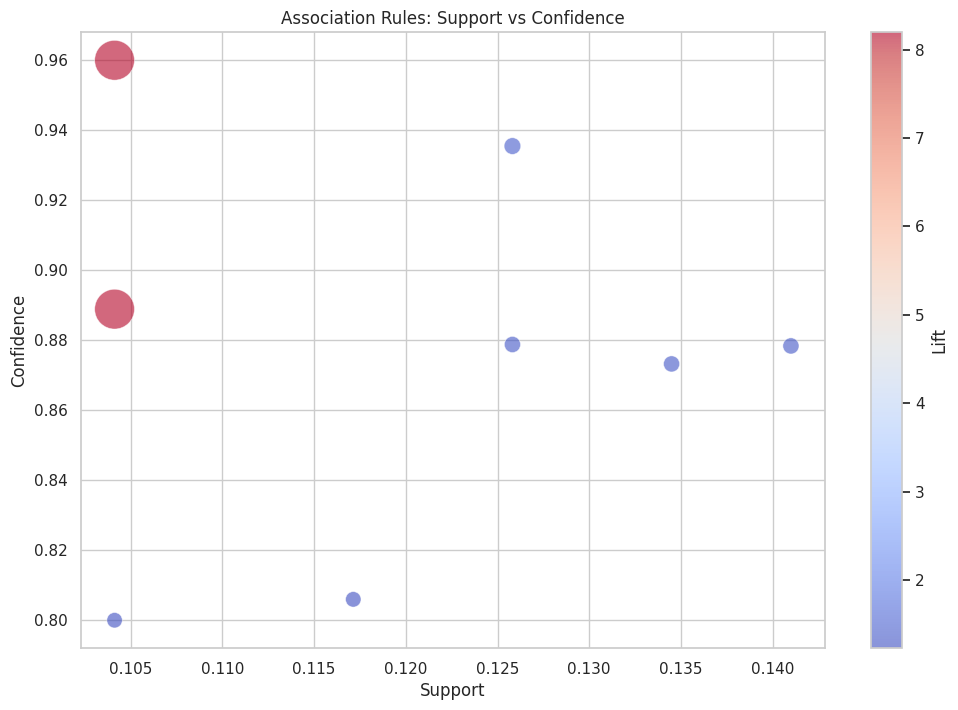

In [30]:


# Create a figure with specified size
plt.figure(figsize=(12, 8))

# Scatter plot for association rules
scatter = plt.scatter(
    data=association_rules,                          # Use the association rules DataFrame
    x='support',                     # X-axis: Support values
    y='confidence',                  # Y-axis: Confidence values
    s=association_rules['lift'] * 100,              # Size of points based on Lift values
    c=association_rules['lift'],                     # Color of points based on Lift values
    cmap='coolwarm',                 # Colormap for point colors
    alpha=0.6,                       # Transparency of points
    edgecolors='w',                  # White edges for better visibility
    linewidth=0.5                    # Edge line width
)

# Set plot title and labels
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')

# Add color bar to indicate Lift values
plt.colorbar(scatter, label='Lift')

# Display the plot
plt.show()


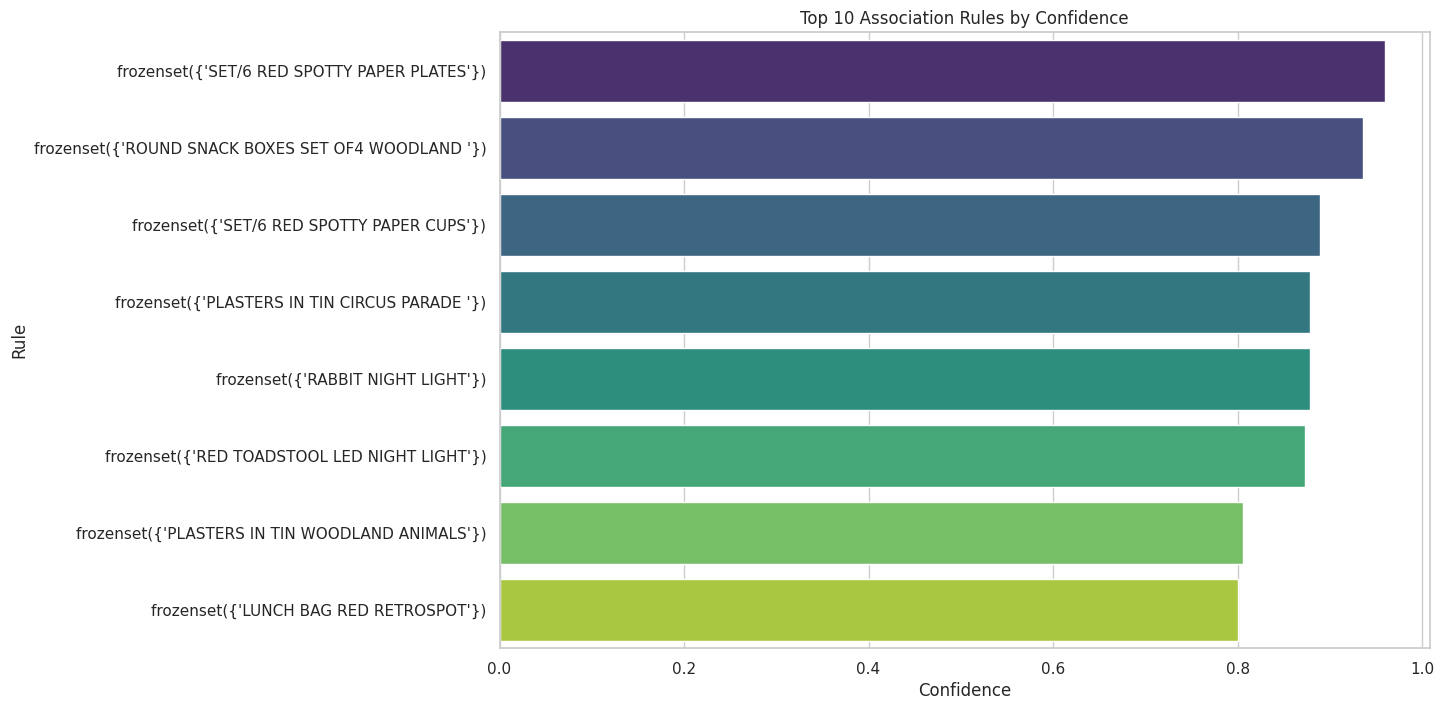

In [31]:

# Select the top 10 association rules sorted by confidence
top_confidence_rules = association_rules.sort_values(by='confidence', ascending=False).head(10)

# Create a figure with specified size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 10 rules by confidence
sns.barplot(
    data=top_confidence_rules,       # Use the DataFrame with top rules
    x='confidence',                  # X-axis: Confidence values
    y='antecedents',                 # Y-axis: Antecedents (the items in the rule)
    palette='viridis'                # Color palette for the bars
)

# Set plot title and labels
plt.title('Top 10 Association Rules by Confidence')
plt.xlabel('Confidence')
plt.ylabel('Rule')

# Display the plot
plt.show()


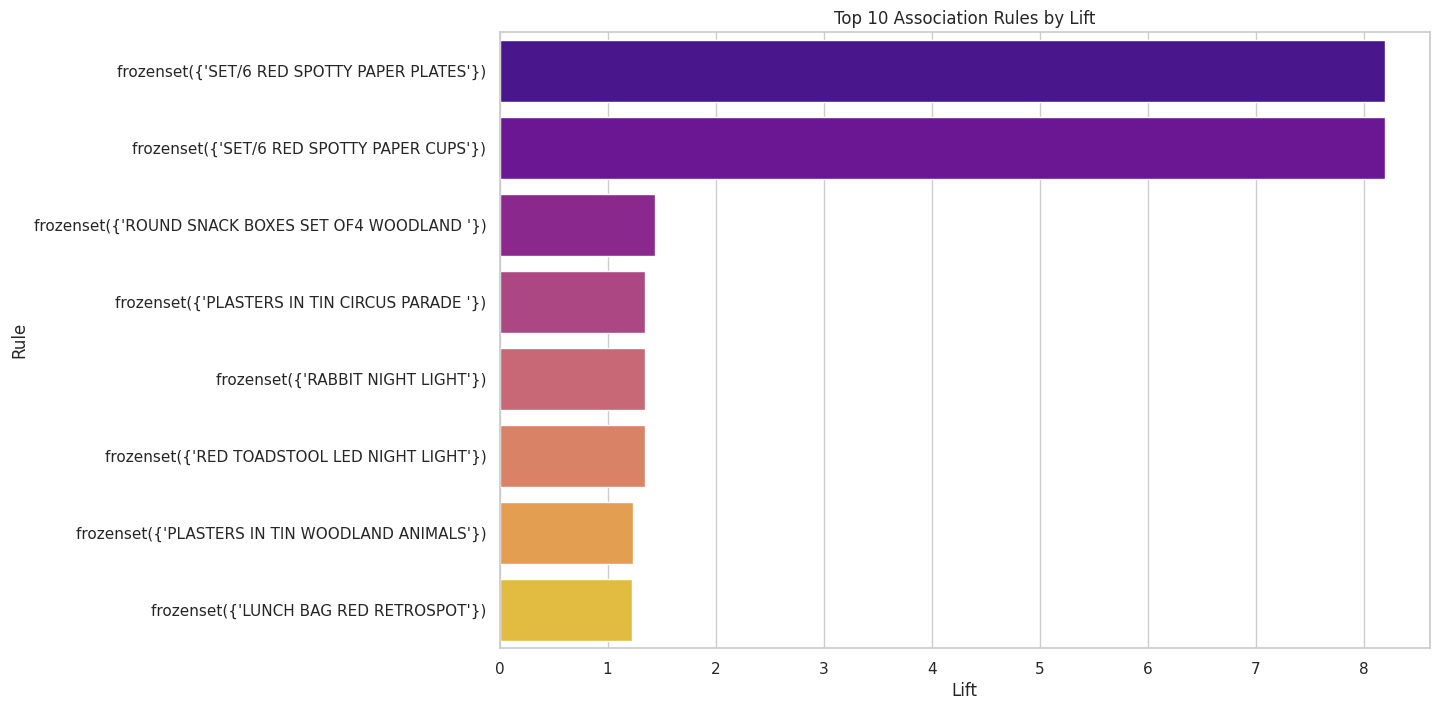

In [32]:

# Select the top 10 association rules sorted by lift
top_lift_rules = association_rules.sort_values(by='lift', ascending=False).head(10)

# Create a figure with specified size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 10 rules by lift
sns.barplot(
    data=top_lift_rules,           # Use the DataFrame with top rules
    x='lift',                      # X-axis: Lift values
    y='antecedents',               # Y-axis: Antecedents (the items in the rule)
    palette='plasma'               # Color palette for the bars
)

# Set plot title and labels
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')

# Display the plot
plt.show()
